## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

2024-02-15 21:41:23.455116: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 21:41:23.455161: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 21:41:23.456005: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 21:41:23.461260: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-15 21:41:24.137213: W tensorflow/compiler/tf2

## Dataset
For this tutorial we use the MNIST Fashion Dataset.  This is a dataset that is included in keras.
This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23, 23]

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
# Names can be found at https://github.com/zalandoresearch/fashion-mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

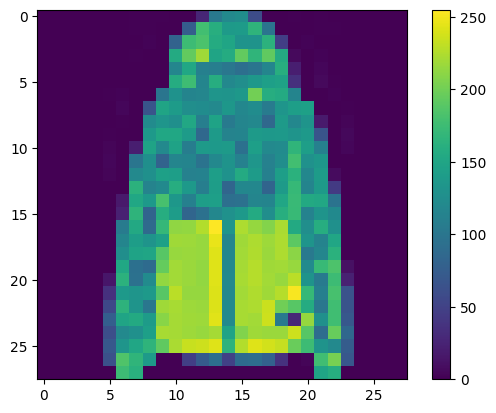

In [7]:
plt.figure()
plt.imshow(train_images[22])
plt.colorbar()
plt.grid(False)
plt.show()

### Data Preprocessing
This is where we apply some prior transformations before feeding to the model.  In this case will simply scale the greyscale pixel values (\[0, 255\]) down to \[0, 1\].  This is because smaller values make it easier for the model to process.

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Building the Model
Finally, we build the model.  We will use a keras sequential model with 3 layers.  This model represents a feed-forward neural network (one that passes values from left to right)

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

2024-02-15 21:41:25.814625: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-15 21:41:25.837286: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-15 21:41:25.837334: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-15 21:41:25.838585: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-15 21:41:25.838646: I external/local_xla/xla/stream_executor

**Layer 1**: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2**: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3**: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.


### Compile the model

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### Train the model

In [11]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8


2024-02-15 21:41:27.186780: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f09f009ff50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-15 21:41:27.186811: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2024-02-15 21:41:27.191120: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-15 21:41:27.203657: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708062087.355942     467 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 8s 3ms/step - loss: 0.5004 - accuracy: 0.8239
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3770 - accuracy: 0.8649
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3365 - accuracy: 0.8769
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3146 - accuracy: 0.8849
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2975 - accuracy: 0.8904
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2814 - accuracy: 0.8962
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2673 - accuracy: 0.9007
Epoch 8/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2577 - accuracy: 0.9037


### Evaluating the model

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8794
Test accuracy: 0.8794000148773193


### Making Predictions

In [13]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


This is a function from the Tensorflow tutorial for showing predictions

In [17]:
%matplotlib inline

Pick a number: 1
1/1 [==============================] - 0s 12ms/step


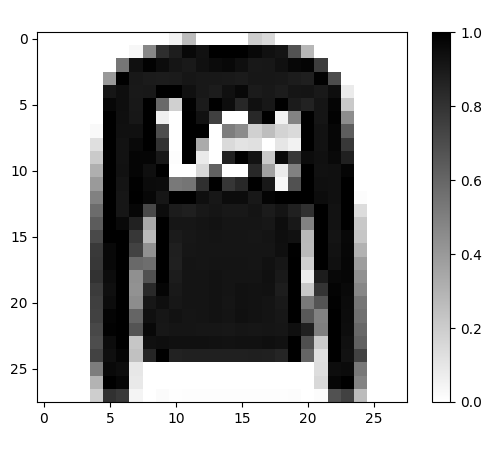

In [18]:
COLOR = 'blue'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

Pick a number: 2
1/1 [==============================] - 0s 14ms/step


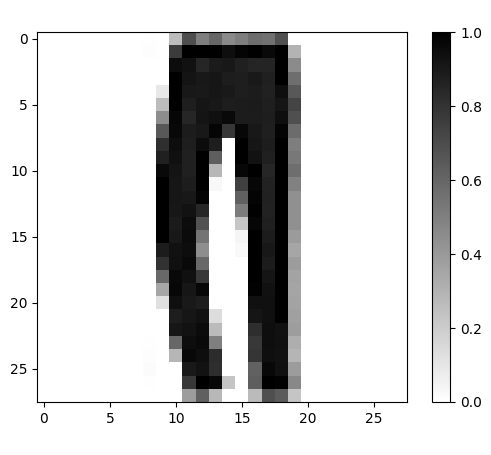

In [15]:
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)